In [2]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
import SEOBNRE
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv
##########################
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random


In [3]:
try:
    parser = argparse.ArgumentParser(description="Simple argument parser")
    parser.add_argument("-c", action="store", dest="config_file")
    result = parser.parse_args()
    config_file=result.config_file
    parser = ConfigParser()
    parser.read(config_file)
    parser.sections()
except SystemExit: 
    print("SystemExit")
    parser = ConfigParser()
    parser.read('config_TSEOBNRE.ini')
    parser.sections()
    pass

export_folder='/work/kailai.wang/Eccentricity_project/export_folder/rit_mismatch_tseob_new_debug'
export_bool=eval(parser.get('setup','export'))




SystemExit


usage: ipykernel_launcher.py [-h] [-c CONFIG_FILE]
ipykernel_launcher.py: error: unrecognized arguments: -f /work/kailai.wang/.local/share/jupyter/runtime/kernel-bf3f5cf8-a5ed-4b5b-9811-375a4bc6204d.json


In [4]:
import glob
json_files=glob.glob('/work/francisco.jimenez/RIT/Metadata/*Metadata.json',recursive = True)

In [5]:
import importlib
importlib.reload(sxs)
conditions=np.asarray([['BHBH',None],['Non-Precessing',None],['Eccentricity',['>=0.01','<=0.50']]])
ritcat=sxs.SXS_catalogue("/work/francisco.jimenez/RIT/Data",conditions,catalogue="RIT")

systems=np.array([ritcat.metadata(j,parameters_list=['catalog-tag','system-type','eccentricity','relaxed-mass-ratio-1-over-2',
                                                     'final-mass','final-chi','initial-bh-chi1z','initial-bh-chi2z','freq-start-22']) for j in json_files])

/work/kailai.wang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
boolean= np.array(['e' in elist for elist in systems[:,0]])

for i in range(len(systems)):
    if 'e' in systems[:,0][i] and float(systems[:,2][i])<0.5:
        boolean[i]=True
    else:
        boolean[i]=False

ecc_prec_cases=systems[boolean]
boolean = np.array(['Precessing' not in elist for elist in ecc_prec_cases])
ecc_cases=ecc_prec_cases[boolean]
ecc_cases[:,2]=np.array([float(i[2]) for i in ecc_cases])
ecc_cases[:,3]=np.array([1/float(i[3]) for i in ecc_cases])
ecc_cases[:,4]=np.array([float(i[4]) for i in ecc_cases])
ecc_cases[:,5]=np.array([float(i[5]) for i in ecc_cases])
ecc_tags=ecc_cases[:,0]


h5_files=[glob.glob('/work/francisco.jimenez/RIT/Data/*'+j.replace(':','-')+'*',recursive = True)[0] for j in ecc_tags]

In [7]:
modes=[[2,2]]
len(ecc_tags),len(h5_files)
ecc_cases[0]

array(['RIT:eBBH:1173', 'Nonspinning', '0.2', '3.999974051104801',
       '0.9784859393', '0.4757486824', '0', '0', '0.007390109739'],
      dtype='<U20')

In [8]:
for i in range(0,len(ecc_cases)):
    #if "1223" in ecc_cases[i][0]:
        print(i, ecc_cases[i][0])


0 RIT:eBBH:1173
1 RIT:eBBH:1180
2 RIT:eBBH:1178
3 RIT:eBBH:1843
4 RIT:eBBH:1224
5 RIT:eBBH:1400
6 RIT:eBBH:1101
7 RIT:eBBH:1097
8 RIT:eBBH:1256
9 RIT:eBBH:1517
10 RIT:eBBH:1333
11 RIT:eBBH:1740
12 RIT:eBBH:1164
13 RIT:eBBH:1356
14 RIT:eBBH:1233
15 RIT:eBBH:1116
16 RIT:eBBH:1241
17 RIT:eBBH:1201
18 RIT:eBBH:1540
19 RIT:eBBH:1425
20 RIT:eBBH:1156
21 RIT:eBBH:1273
22 RIT:eBBH:1539
23 RIT:eBBH:1124
24 RIT:eBBH:1378
25 RIT:eBBH:1216
26 RIT:eBBH:1765
27 RIT:eBBH:1141
28 RIT:eBBH:1301
29 RIT:eBBH:1264
30 RIT:eBBH:1297
31 RIT:eBBH:1138
32 RIT:eBBH:1133
33 RIT:eBBH:1808
34 RIT:eBBH:1140
35 RIT:eBBH:1883
36 RIT:eBBH:1764
37 RIT:eBBH:1217
38 RIT:eBBH:1379
39 RIT:eBBH:1139
40 RIT:eBBH:1296
41 RIT:eBBH:1265
42 RIT:eBBH:1902
43 RIT:eBBH:1157
44 RIT:eBBH:1424
45 RIT:eBBH:1200
46 RIT:eBBH:1125
47 RIT:eBBH:1538
48 RIT:eBBH:1272
49 RIT:eBBH:1232
50 RIT:eBBH:1165
51 RIT:eBBH:1741
52 RIT:eBBH:1117
53 RIT:eBBH:1401
54 RIT:eBBH:1225
55 RIT:eBBH:1842
56 RIT:eBBH:1179
57 RIT:eBBH:1181
58 RIT:eBBH:1172
59 RIT:

In [9]:
# tag

[]
Found! RIT:eBBH:1173
system type: Nonspinning
eccentricity 0.2
relaxed_mass_ratio_1_over_2: 3
final_mass: 0.9784859393
final_chi: 0.4757486824
initial_bh_chi1z: 0
initial_bh_chi2z: 0
initial_freq: 0.007390109739


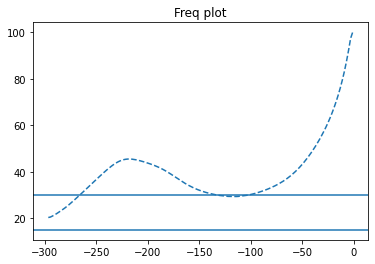

massratio:  3
mass1:  75.0
mass2:  25.0
spin1:  0.0
spin2:  0.0
Meta eccentricity 0.2
eccentricity:  0.19390862347612947
initial physical frequency:  15.006968144780863
---------------
fmin15.006968144780863
Running dynesty...


26it [00:01, 13.79it/s, +10 | bound: 0 | nc: 1 | ncall: 129 | eff(%): 30.252 | loglstar:   -inf < -0.013 <    inf | logz: -0.147 +/-    nan | dlogz:  0.009 >  0.100]


Summary
nlive: 10
niter: 26
ncall: 119
eff(%): 30.252
logz: -0.147 +/-  0.083


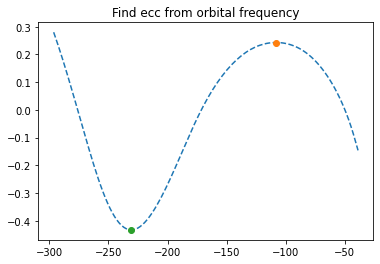

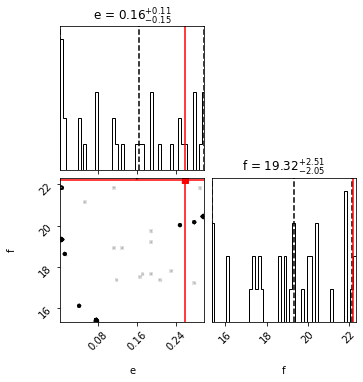

bvals: [ 0.25929601 22.20161191]
model:  TSEOBNRE


/work/kailai.wang/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/work/kailai.wang/venv/lib/python3.7/site-packages/scipy/interpolate/_bsplines.py:327: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.ascontiguousarray(x.ravel(), dtype=np.float_)


Mismatch: 0.005063690524056641
Max mismatch found: 0.010713325967458887


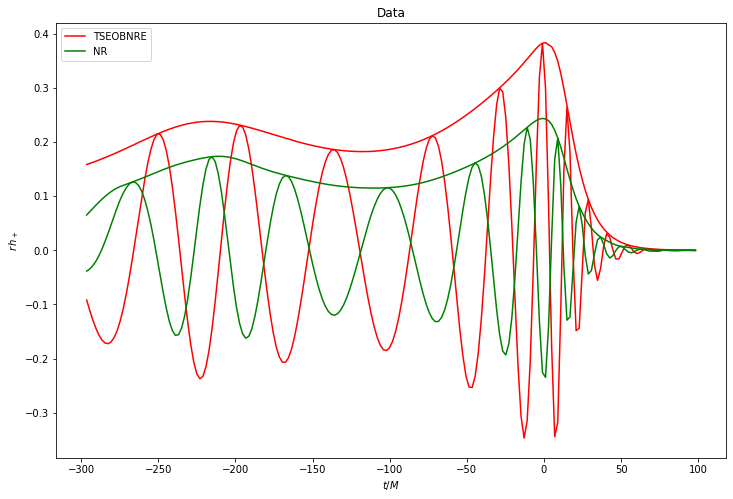

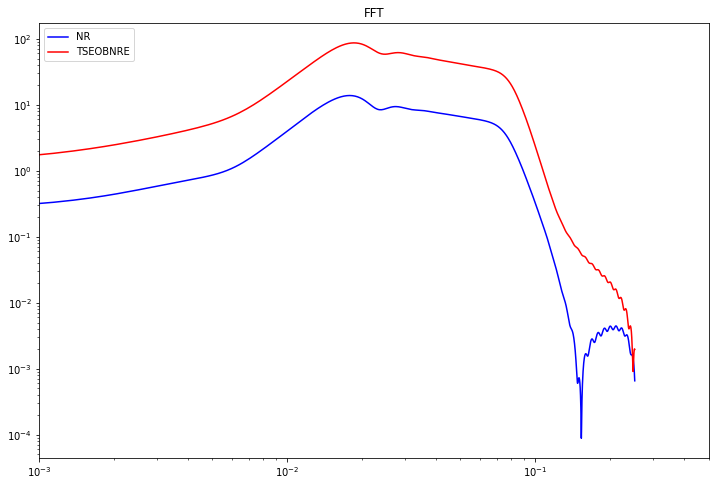

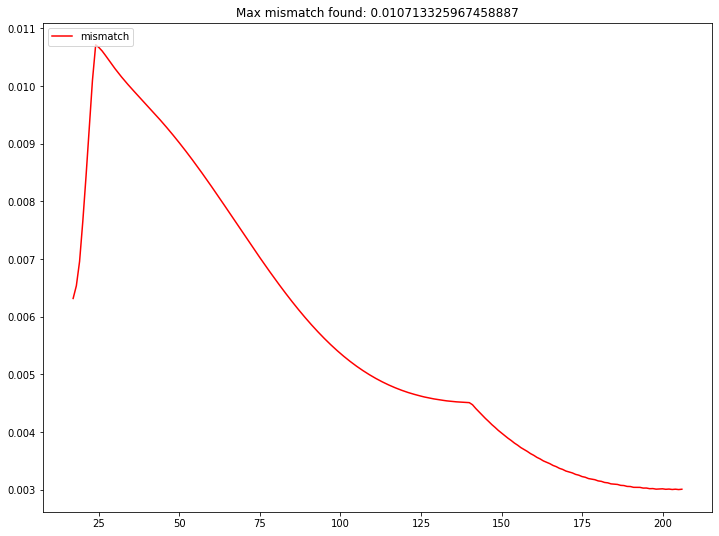

Found! RIT:eBBH:1180
system type: Nonspinning
eccentricity 0.235
relaxed_mass_ratio_1_over_2: 3
final_mass: 0.9772204428
final_chi: 0.4770698194
initial_bh_chi1z: 0
initial_bh_chi2z: 0
initial_freq: 0.007390109739


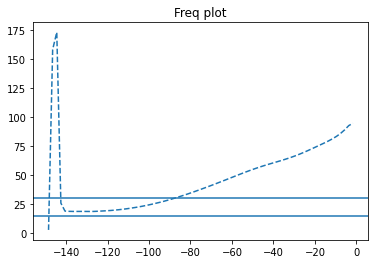

massratio:  3
mass1:  75.0
mass2:  25.0
spin1:  0.0
spin2:  0.0
Meta eccentricity 0.235
eccentricity:  0.12555624916811292
initial physical frequency:  15.006968144780863
---------------
fmin15.006968144780863
Running dynesty...


26it [00:07,  3.71it/s, +10 | bound: 4 | nc: 1 | ncall: 402 | eff(%):  9.184 | loglstar:   -inf < -0.397 <    inf | logz: -0.471 +/-    nan | dlogz:  0.008 >  0.100]


Summary
nlive: 10
niter: 26
ncall: 392
eff(%):  9.184
logz: -0.471 +/-  0.078


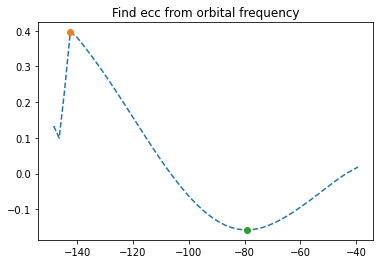

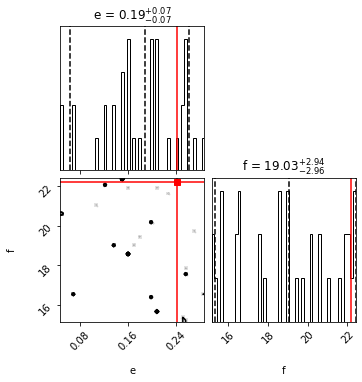

bvals: [ 0.24195707 22.20971989]
model:  TSEOBNRE


/work/kailai.wang/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/work/kailai.wang/venv/lib/python3.7/site-packages/scipy/interpolate/_bsplines.py:327: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.ascontiguousarray(x.ravel(), dtype=np.float_)


Mismatch: 0.008103178266715028
Max mismatch found: 0.00853056580570799


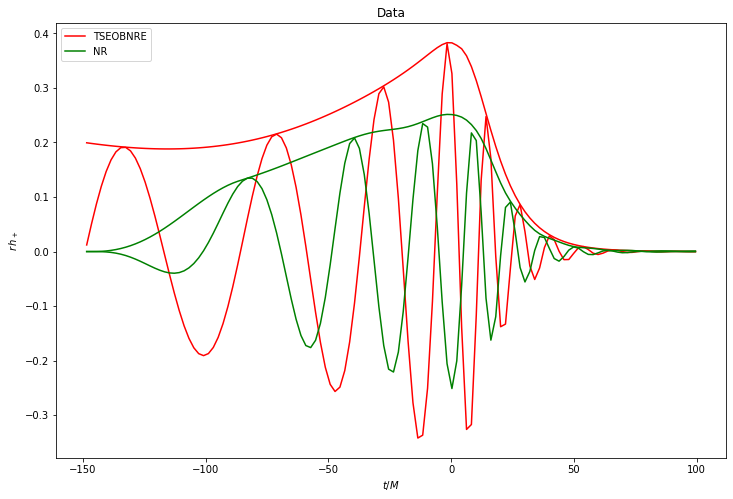

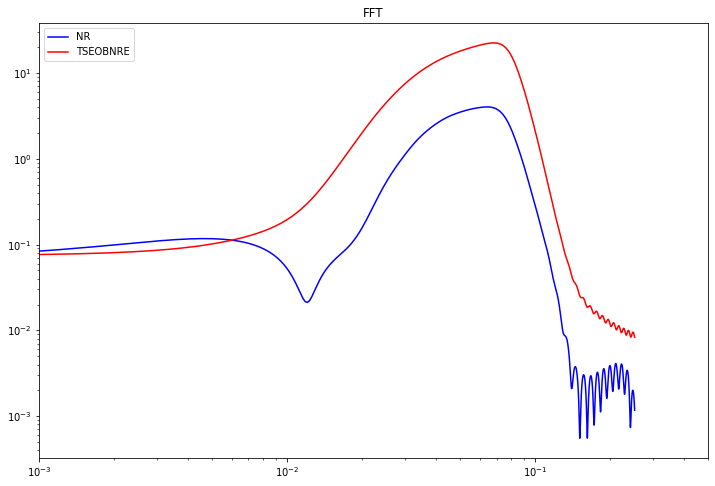

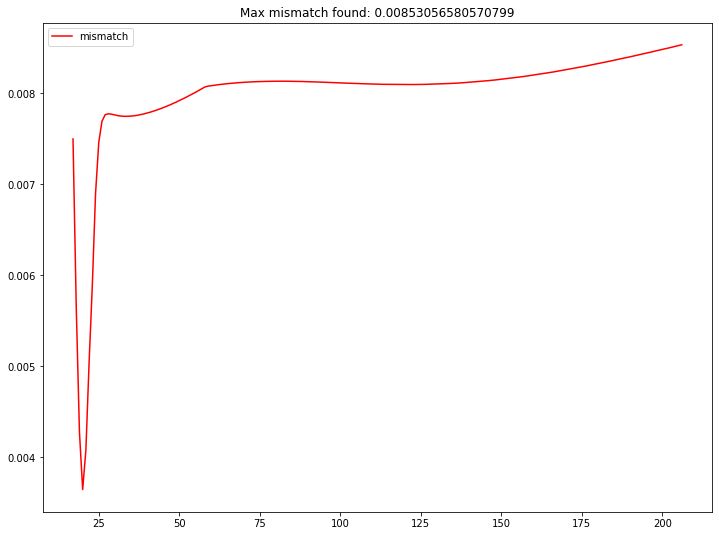

Found! RIT:eBBH:1178
system type: Nonspinning
eccentricity 0.225
relaxed_mass_ratio_1_over_2: 3
final_mass: 0.9770870742
final_chi: 0.4708503345
initial_bh_chi1z: 0
initial_bh_chi2z: 0
initial_freq: 0.007390109739


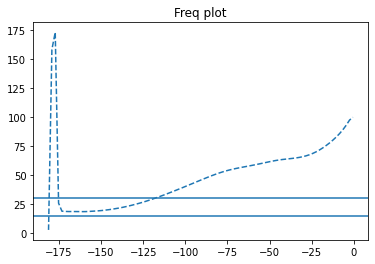

massratio:  3
mass1:  75.0
mass2:  25.0
spin1:  0.0
spin2:  0.0
Meta eccentricity 0.225
eccentricity:  0.10070526339742088
initial physical frequency:  15.006968144780863
---------------
fmin15.006968144780863
Running dynesty...


26it [00:02, 11.95it/s, +10 | bound: 0 | nc: 1 | ncall: 142 | eff(%): 27.273 | loglstar:   -inf < -0.413 <    inf | logz: -0.495 +/-    nan | dlogz:  0.008 >  0.100]


Summary
nlive: 10
niter: 26
ncall: 132
eff(%): 27.273
logz: -0.495 +/-  0.079


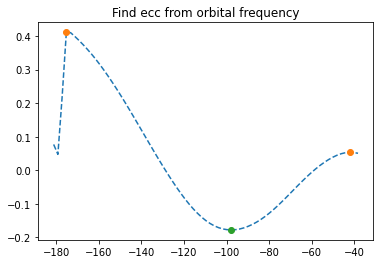

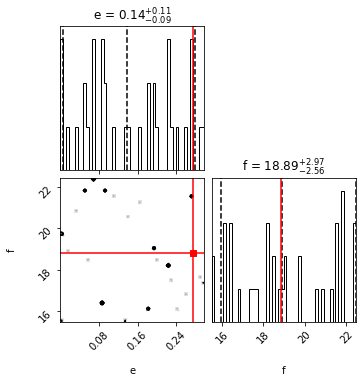

bvals: [ 0.27432389 18.83164349]
model:  TSEOBNRE


/work/kailai.wang/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/work/kailai.wang/venv/lib/python3.7/site-packages/scipy/interpolate/_bsplines.py:327: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.ascontiguousarray(x.ravel(), dtype=np.float_)


Mismatch: 0.006988621008211071
Max mismatch found: 0.007634500479028028


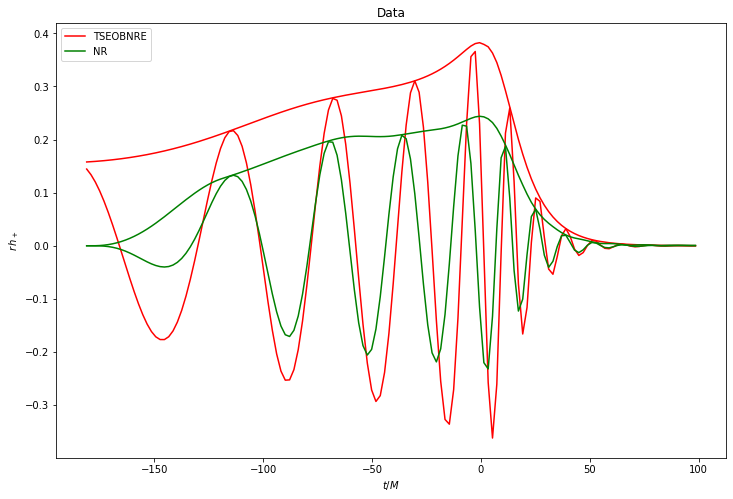

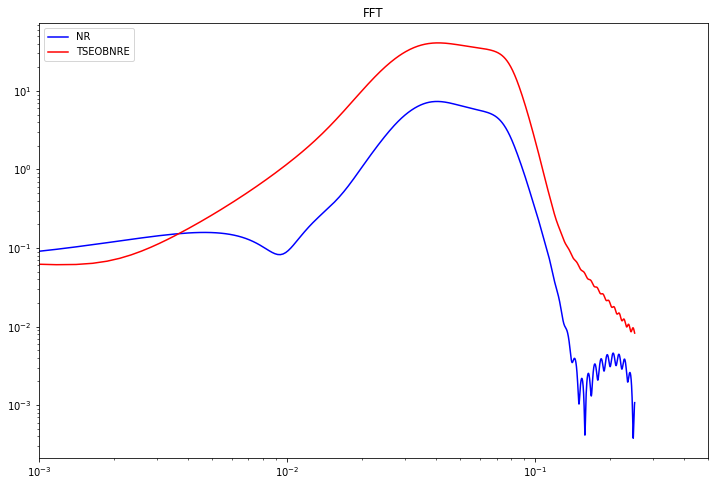

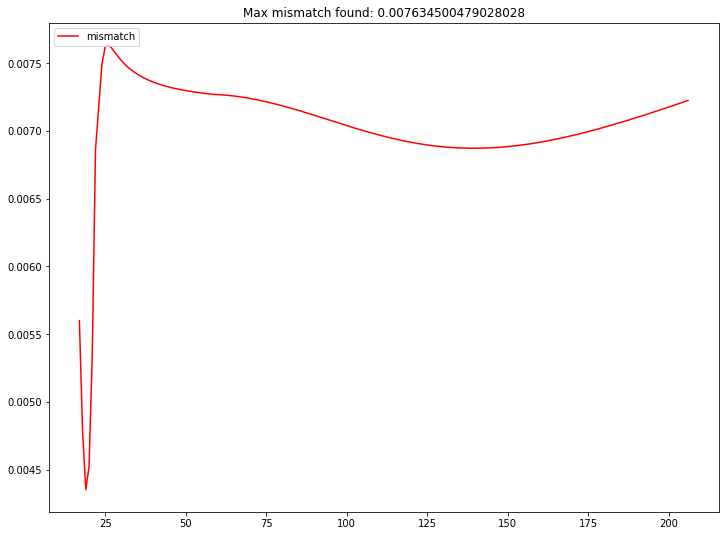

Found! RIT:eBBH:1843
system type: Aligned
eccentricity 0.4671
relaxed_mass_ratio_1_over_2: 3
final_mass: 0.9866808953
final_chi: 0.0676110688
initial_bh_chi1z: 0
initial_bh_chi2z: -0.8
initial_freq: 0.002463369913


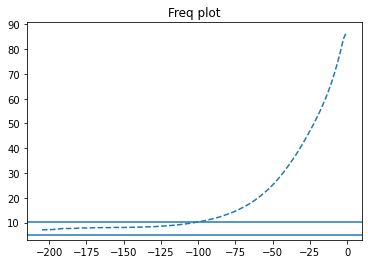

massratio:  3
mass1:  75.0
mass2:  25.0
spin1:  0.0
spin2:  -0.8
Meta eccentricity 0.4671
eccentricity:  0.4671
initial physical frequency:  5.0023227149269545
---------------
fmin5.0023227149269545
Running dynesty...


/work/kailai.wang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in double_scalars
11it [00:05,  1.86it/s, bound: 0 | nc: 5 | ncall: 34 | eff(%): 32.353 | loglstar:   -inf < -0.502 <    inf | logz: -1.028 +/-  0.219 | dlogz:  0.551 >  0.100]


KeyboardInterrupt: 

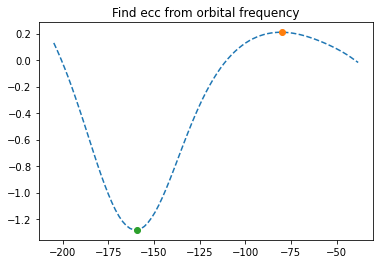

In [10]:
wave={}
h5_files_list=[]
# x=0
# while x<252:
#     h5_files_list.append(x)
#     x+=90
    
    
print(h5_files_list)




for i in range(0, 20):
    #try:
        tag=ecc_tags[i]
        wave[tag]=sxs.Generate_Georgia_Waveform(h5_files[i],modes,
                                        zero_align=False,
                                        sampling_rate=0.1,modes_combined=False,inclination=0,
                                        coa_phase=0,RD=False,toffset=0)
        rit_t=wave[ecc_tags[i]][0][:,0]
        rit_h=wave[ecc_tags[i]][0][:,1]
        #----------------------------------------------------------------------
        for name in ecc_cases:
            if name[0]==ecc_tags[i]:
                ritwavename=str(name[0])
                print("Found! " + str(name[0]))
                system_type=name[1]
                print("system type: " + str(system_type))
                eccentricity = name[2]
                print("eccentricity "+str(eccentricity))
                relaxed_mass_ratio_1_over_2=[3][0]
                print("relaxed_mass_ratio_1_over_2: "+ str(relaxed_mass_ratio_1_over_2))
                final_mass=name[4]
                print("final_mass: "+ str(final_mass))
                final_chi=name[5]
                print("final_chi: "+ str(final_chi))
                initial_bh_chi1z=name[6]
                print("initial_bh_chi1z: "+ str(initial_bh_chi1z))
                initial_bh_chi2z=name[7]
                print("initial_bh_chi2z: "+ str(initial_bh_chi2z))
                initial_freq=float(name[8])
                print("initial_freq: "+ str(initial_freq))
        #----------------------------------------------------------------------
        initial_freq=1.*initial_freq
        rit_wave_int=interp1d(rit_t.real,rit_h, kind='cubic')
        mass=100
        sxs_wave_int=rit_wave_int
        times=rit_t.real
        #print(times[0])
        dt=fun.time_to_t_NR(1/1024.,mass)
        times= np.arange(times[0], times[-1], dt)
        sxs_wave = sxs_wave_int(times)
        # if times[0]+200>=-100:
        #     boolean=np.logical_and(times >= (times[0]), times<=0)
        # else:
        #     boolean=np.logical_and(times >= (times[0]+200), times<=0)
        if times[0]>-200:
            boolean=np.logical_and(times >= (times[0]+10), times<=0)
        elif times[0]>-400:
            boolean=np.logical_and(times >= (times[0]+50), times<=0)
        elif times[0]+200>=-1500:
            boolean=np.logical_and(times >= (times[0]+200), times<=0)
            #boolean=np.logical_and(times >= (times[0]+200), times<=times[0]+5000)
            #boolean=np.logical_and(times >= (-5000), times <= 0)
        else:
            boolean=np.logical_and(times >= (times[0]+200), times<=0)
            #boolean=np.logical_and(times >= (times[0]+200), times<=times[0]+5000)
            #boolean=np.logical_and(times >= (-5000), times <= 0)

        sxs_wave = sxs_wave[boolean]
        times = times[boolean]
    #----------------------------------------------------------------------
        sxsphas = np.angle(sxs_wave)
        sxsphas = np.unwrap(sxsphas)
        sxsfreq = np.gradient(sxsphas, times)
        sxsfreq_int = interp1d(times,sxsfreq,kind='cubic')
        plt.plot(times, fun.f_to_Phys(sxsfreq,mass)/(2*np.pi), '--', label=r'$\Re{(Rh_{22}/(M\nu))}$')
        plt.axhline(fun.f_to_Phys(initial_freq,mass))
        plt.axhline(fun.f_to_Phys(2*initial_freq,mass))
        plt.title("Freq plot")
        plt.show()
    #----------------------------------------------------------------------
        ecc_nr=eccentricity
        massratio=relaxed_mass_ratio_1_over_2
        mass1=100*1/(massratio+1)*massratio
        mass2=100*1/(massratio+1)
        spin1=float(initial_bh_chi1z)
        spin2=float(initial_bh_chi2z)
        omega_0=initial_freq*2*np.pi
        T_0= 2*np.pi/omega_0
        f_0 = omega_0/(2*np.pi)
        bool_fact=times<=times[0]+100+8*T_0
        times_fit=times[bool_fact]
        sxsfreq_fit=sxsfreq[bool_fact]
        freqcfit=np.polyfit(times_fit, sxsfreq_fit, 2)
        sxsfreq_fitc = np.poly1d(freqcfit)
        sxsfreq_ecc_estimate=1-sxsfreq_fit/sxsfreq_fitc(times_fit)
        sxsfreq_ecc_estimate=fun.moving_average(sxsfreq_ecc_estimate, 20)
        times_fit = times_fit[:-19]
        peaks_pos=find_peaks(sxsfreq_ecc_estimate, height=0)
        peaks_neg=find_peaks(-sxsfreq_ecc_estimate, height=-0)
        plt.plot(times_fit, sxsfreq_ecc_estimate, '--', label=r'$circular$')
        plt.plot(times_fit[peaks_pos[0]], peaks_pos[1]['peak_heights'], 'o', label=r'$circular$')
        plt.plot(times_fit[peaks_neg[0]],-peaks_neg[1]['peak_heights'], 'o', label=r'$circular$')
        plt.title("Find ecc from orbital frequency")
        # eccentricity estimate as in Eq. 2.8 odf 1909.11011
        wp =omega_0*(1 + np.mean(peaks_pos[1]['peak_heights']))
        wa =omega_0*(1 - np.mean(peaks_neg[1]['peak_heights']))
        ecc_NR = (wp**0.5 - wa**0.5)/(wp**0.5 + wa**0.5)
        if wa<0:
            ecc_NR=eccentricity
        initial_freq_phys=fun.f_to_Phys(initial_freq,mass)
        print('massratio: ',massratio)
        print('mass1: ',mass1)
        print('mass2: ',mass2)
        print('spin1: ',spin1)
        print('spin2: ',spin2)
        print('Meta eccentricity', eccentricity)
        print('eccentricity: ', ecc_NR)
        print('initial physical frequency: ', initial_freq_phys)
        print('---------------')

    #----------------------------------------------------------------------
        emin=0
        distance = 100; inclination = 0; l=2; m=2;
        emax=0.3
        if float(eccentricity)>emax:
            emax=float(eccentricity)
        bvals=[]
        #bvals=np.array([ 0.37419166, 14.98812769])
        model='TSEOBNRE'
        #model='SEOBNRE'

        print("fmin"+str(initial_freq_phys))
        ecc_clas=fun.Eccentricity_PE([mass1,mass2,spin1,spin2,distance],
                              sxsfreq_int,model=model,times=times,sxsfreq=sxsfreq,
                              emin=emin,emax=emax,fmin=initial_freq_phys,fmax=1.5*initial_freq_phys)
        
        ecc_clas.log_likelihood([0.1,10])
        if bvals==[]:
            print("Running dynesty...")
            #Define min and max eccentricity for the priors
            pool = choose_pool(8)
            pool.size=8
            nlive = 10
            f2=dynesty.NestedSampler(ecc_clas.log_likelihood,ecc_clas.prior_transform,2,nlive=nlive,sample='rwalk',pool=pool)
            f2.run_nested(print_progress=True,dlogz=0.1)
            pool.close()
            res = f2.results
            res.samples_u.shape
            res.summary()
            samps=f2.results.samples
            postsamps = fun.posterior_samples(f2)
            bvals = postsamps[-1]
            fg=corner.corner(postsamps,quantiles=[0.05,0.5,0.95],show_titles=True,max_n_ticks = 4,bins=50,truths=bvals,labels=['e','f'],truth_color='red')
            plt.show()
        else:
            print("Skipped dynesty...")
            bvals=bvals
        print("bvals: "+ str(bvals))

        #----------------------------------------------------------------------
        info_name=['name','massratio', 'mass1', 'mass2', 'spin1', 'spin2', 'meta_ecc', 'est_ecc', 'f0', 'ecc_bvals', 'f_bvals']
        info_value=[ritwavename,massratio, mass1, mass2, spin1, spin2, eccentricity, ecc_NR, fun.f_to_Phys(initial_freq,mass), bvals[0], bvals[1]]

        export_info=export_folder+'/model_'+model+'_'+ritwavename+'_massratio_'+str(np.around(massratio,2))+'_spin1_'+str(np.around(spin1,2))+'_spin2_'+str(np.around(float(spin2),2))+'_ecc_'+str(np.around(bvals[0],3))+'_eccNR_'+str(np.around(float(eccentricity),3))+'.csv'
        export_mismatch=export_folder+'/rit_mismatch_'+model+'_'+ritwavename+'_massratio_'+str(np.around(float(massratio),2))+'_spin1_'+str(np.around(float(spin1),2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccMeta_'+str(np.around(float(eccentricity),3))+'.csv'
        mismatch_plot=export_folder+'/mismatchplot_'+model+'_'+ritwavename+'_massratio_'+str(np.around(float(massratio),2))+'_spin1_'+str(np.around(float(spin1),2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccMeta_'+str(np.around(float(eccentricity),3))+'.png'
        wave_td_plot=export_folder+'/td_plot_'+model+'_'+ritwavename+'_massratio_'+str(np.around(float(massratio),2))+'_spin1_'+str(np.around(float(spin1),2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccMeta_'+str(np.around(float(eccentricity),3))+'.png'
        wave_fd_plot=export_folder+'/fd_plot_'+model+'_'+ritwavename+'_massratio_'+str(np.around(float(massratio),2))+'_spin1_'+str(np.around(float(spin1),2))+'_spin2_'+str(np.around(float(spin2),2))+'_eccMeta_'+str(np.around(float(eccentricity),3))+'.png'



        if export_bool:
            with open(export_info,'w') as file:
                writer =csv.writer(file)
                writer.writerow(info_name)
                writer.writerow(info_value)
        #----------------------------------------------------------------------

        #def final_wave():
        print("model: ", model)
        dict = {'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
        times_seobe, h_seobe_nr= dict[model](bvals,strain=True)
        times_seobe_phys = fun.time_to_t_Phys(times_seobe,mass)
        
        h_seobe_phys = fun.amp_to_nr(h_seobe_nr,mass,distance,2,2,0)

        #def plot_the_data():
        if times_seobe[0]>=times[0]:
            times_seobe_v1 = times_seobe[:np.argmax(times_seobe >= (100))]
            h_seobe_nr = h_seobe_nr[:np.argmax(times_seobe >= (100))]
            sxs_wave = sxs_wave_int(times_seobe_v1)
            times = times_seobe_v1
        else:
            times = np.arange(times[0], 100, dt)
            sxs_wave = sxs_wave_int(times)

            eob_int=interp1d(times_seobe, h_seobe_nr, kind='cubic')
            h_seobe_nr=eob_int(times)
        # plot the nr data in phys. units
        figband = plt.figure(figsize = (12, 8))
        paper_prefactor=0.204124145232
        #store=h_seobe_nr[0]
        # h_seobe_nr = fun.amp_to_nr(h_seobe_nr,mass,distance,2,2,0)
        # h_seobe_nr = fun.amp_to_nr(h_seobe_nr,mass,distance,2,2,0)
        # h_seobe_nr.real = h_seobe_nr.real*(10**20)
        # h_seobe_nr.imag = h_seobe_nr.imag*(10**20)
        plt.plot(times, 0.25*h_seobe_nr.real, label=model,color='r')
        plt.plot(times, 0.25*np.sqrt(h_seobe_nr.real**2+h_seobe_nr.imag**2),color='r',label=None)

        #   plt.plot(times, 0.19*h_seobe_nr*(np.exp(1j*3.14)).real, label=model,color='r')
        #   plt.plot(times, 0.19*np.sqrt(h_seobe_nr.real**2+h_seobe_nr.imag**2),color='r',label=None)

        plt.plot(times, sxs_wave.real, label='NR',color='g')
        plt.plot(times, np.sqrt(sxs_wave.real**2+sxs_wave.imag**2),color='g',label=None)
        plt.xlabel(r'$t/M$')
        plt.ylabel(r'$r \, h_+$')
        #plt.xlim(-200,200)
        plt.title(r'inclination = '+str(inclination/np.pi))
        plt.legend(loc='upper left')
        plt.title("Data")
        if export_bool:
            figband.savefig(wave_td_plot)

    #----------------------------------------------------------------------------
        #fourier and another plot
        h_px=np.array([times,sxs_wave]).T 
        h_eob=np.array([times,h_seobe_nr]).T 
        tlow_nr = h_eob[0,0]+ 150
        thigh_nr = 150
        sigmalo = 100

        tlow_eob = h_eob[0,0]+ 150
        thigh_eob = 150

        px_fft=fun.FFT_ZeroPadded_Windowed( h_px, nleft=1000,nright=1000,x_low=tlow_nr, sigma_low=sigmalo,x_high=thigh_nr,sigma_high=sigmalo)
        eob_fft=fun.FFT_ZeroPadded_Windowed(h_eob,nleft=1000,nright=1000,x_low=tlow_eob,sigma_low=sigmalo,x_high=thigh_eob,sigma_high=sigmalo)
        flow = 8
        delta_f = 1.0 /16
        flen = int(2048 / delta_f) + 1
        frange=np.arange(flow,flow+delta_f*flen,delta_f)
        psd_noise = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
        psd_int=interp1d(frange, psd_noise, kind='cubic')

        figband = plt.figure(figsize = (12, 8))
        plt.plot(px_fft[:,0], np.abs(px_fft[:,1]),'b',label='NR')
        plt.plot(eob_fft[:,0], np.abs(eob_fft[:,1]),'r',label=model)
        plt.yscale('log')
        plt.xscale('log')
        plt.legend(loc='upper left')
        plt.xlim(0.001,0.5)
        plt.title("FFT")
        if export_bool:
            figband.savefig(wave_fd_plot)
    #----------------------------------------------------------------------------
        print("Mismatch: "+ str(1-fun.EasyMatch(px_fft,eob_fft,psd_int,20,2000,nright=3000,f_units='Mf',mass=mass)))
        #mismatch between different masses
        mmatch=[None]*198
        for m in range(10,200):
            fmin=max(fun.f_to_Phys(f_0,m),20)
            #print(fmin)
            mmatch[m-3]=1-fun.EasyMatch(px_fft,eob_fft,psd_int,fmin,1000,nright=3000,f_units='Mf',mass=m)
        figband = plt.figure(figsize = (12, 9))
        x=np.arange(10,208)
        acc_max=-1000
        for i in mmatch:
            if i!=None and i>=acc_max:
                acc_max=i
        print("Max mismatch found: " + str(acc_max))
        plt.plot(x, mmatch,'r',label=r'mismatch')
        plt.legend(loc='upper left')
        if export_bool:
            figband.savefig(mismatch_plot)
        plt.title("Max mismatch found: " + str(acc_max))
        plt.show()
        
        if export_bool:
            with open(export_mismatch,'w') as file:
                writer =csv.writer(file)
                writer.writerow(['mass','mismatch'])
                writer.writerows(np.array([x,mmatch]).T)

    #except:
        #pass
